In [1]:
import ROOT
ROOT.gStyle.SetFrameLineWidth(3)
ROOT.gStyle.SetLineWidth(3)
ROOT.gStyle.SetOptStat(0)
ROOT.gROOT.SetBatch(True)
ROOT.TGaxis.SetMaxDigits(3)

Welcome to JupyROOT 6.12/07


In [2]:
def make_legend():                                                                                                                                                           
    output = ROOT.TLegend(0.62, 0.5, 0.92, 0.85, "", "brNDC")                                                                                                         
    output.SetNColumns(1)                                                                                                                                             
    output.SetLineWidth(0)                                                                                                                                               
    output.SetLineStyle(0)                                                                                                                                               
    output.SetFillStyle(0)                                                                                                                                               
    output.SetBorderSize(0)                                                                                                                                              
    output.SetTextFont(62)                                                                                                                                               
    return output 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


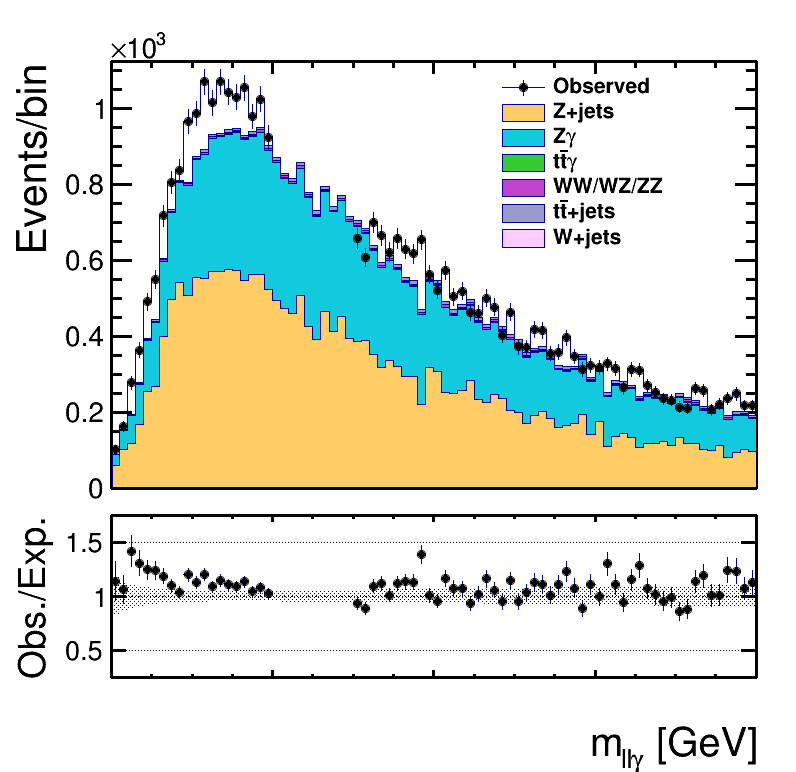

In [5]:
f = ROOT.TFile("Histo/Shapes.root")
hists = {}
hists["Data"] = f.Get("Data")
hists["DYJetsToLL"] = f.Get("DYJetsToLL")
hists["ZGToLLG"] = f.Get("ZGToLLG")
hists["TTGJets"] = f.Get("TTGJets")
hists["Diboson"] = f.Get("Diboson")
hists["TTJets"] = f.Get("TTJets")
hists["WJets"] = f.Get("WJets")

hists["DYJetsToLL"].SetFillColor(ROOT.TColor.GetColor("#ffcc66"))
hists["ZGToLLG"].SetFillColor(ROOT.TColor.GetColor("#12cadd"))
hists["TTGJets"].SetFillColor(ROOT.TColor.GetColor("#32cd32"))
hists["Diboson"].SetFillColor(ROOT.TColor.GetColor("#c243cd"))
hists["TTJets"].SetFillColor(ROOT.TColor.GetColor("#9999cc"))
hists["WJets"].SetFillColor(ROOT.TColor.GetColor("#ffccff"))

hists["Data"].GetXaxis().SetTitle("")
hists["Data"].GetXaxis().SetTitleSize(0)
hists["Data"].GetXaxis().SetNdivisions(505)
hists["Data"].GetYaxis().SetLabelFont(42)
hists["Data"].GetYaxis().SetLabelOffset(0.01)
hists["Data"].GetYaxis().SetLabelSize(0.06)
hists["Data"].GetYaxis().SetTitleSize(0.09)
hists["Data"].GetYaxis().SetTitleOffset(0.7)
hists["Data"].SetTitle("")
hists["Data"].GetYaxis().SetTitle("Events/bin")
hists["Data"].SetMarkerStyle(20)
hists["Data"].SetMarkerSize(1)
hists["Data"].SetLineWidth(1)
hists["Data"].GetXaxis().SetLabelOffset(999)

for bin in range(hists["Data"].GetNbinsX()+1):
    if bin > 20 and bin <= 30:
        hists["Data"].SetBinContent(bin, 0.)
        hists["Data"].SetBinError(bin, 0.)

stack = ROOT.THStack("stack","stack")
stack.Add( hists["DYJetsToLL"] )
stack.Add( hists["ZGToLLG"] )
stack.Add( hists["TTGJets"] )
stack.Add( hists["Diboson"] )
stack.Add( hists["TTJets"] )
stack.Add( hists["WJets"] )

errorBand = hists["DYJetsToLL"].Clone()
errorBand.Add(hists["ZGToLLG"])
errorBand.Add(hists["TTGJets"])
errorBand.Add(hists["Diboson"])
errorBand.Add(hists["TTJets"])
errorBand.Add(hists["WJets"])
errorBand.SetFillColor(ROOT.TColor.GetColor("#000000"))
errorBand.SetFillStyle(3003)

c = ROOT.TCanvas("canvas", "", 0, 0, 800, 800)

pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1)
pad1.Draw()
pad1.cd()
pad1.SetFillColor(0)
pad1.SetBorderMode(0)
pad1.SetBorderSize(10)
pad1.SetTickx(1)
pad1.SetTicky(1)
pad1.SetLeftMargin(0.14)
pad1.SetRightMargin(0.05)
pad1.SetTopMargin(0.122)
pad1.SetBottomMargin(0.026)
pad1.SetFrameFillStyle(0)
pad1.SetFrameLineStyle(0)
pad1.SetFrameLineWidth(3)
pad1.SetFrameBorderMode(0)
pad1.SetFrameBorderSize(10)
pad1.RedrawAxis()

hists["Data"].Draw("hist")
hists["Data"].SetTitle("")
stack.Draw("histsame")
hists["Data"].Draw("esame")

legend = make_legend()                                                                                                                                                   
legend.AddEntry(hists["Data"], "Observed", "elp")                                                                                                                         
legend.AddEntry(hists["DYJetsToLL"], "Z+jets", "f")                                                                                                                         
legend.AddEntry(hists["ZGToLLG"], "Z#gamma", "f")                                                                                                                         
legend.AddEntry(hists["TTGJets"], "t#bar{t}#gamma", "f")                                                                                                                         
legend.AddEntry(hists["Diboson"], "WW/WZ/ZZ", "f")                                                                                                                         
legend.AddEntry(hists["TTJets"], "t#bar{t}+jets", "f")                                                                                                                         
legend.AddEntry(hists["WJets"], "W+jets", "f")                                                                                                                         
legend.Draw()                                                                                                                                                            

c.cd()
pad2 = ROOT.TPad("pad2","pad2",0,0,1,0.35);
pad2.SetTopMargin(0.05);
pad2.SetBottomMargin(0.35);
pad2.SetLeftMargin(0.14);
pad2.SetRightMargin(0.05);
pad2.SetTickx(1)
pad2.SetTicky(1)
pad2.SetFrameLineWidth(3)
pad2.SetGridy()
pad2.Draw()
pad2.cd()

h1 = hists["Data"].Clone()
h1.SetMaximum(1.75)
h1.SetMinimum(0.25)
h1.SetMarkerStyle(20)
h3 = errorBand.Clone()
hwoE = errorBand.Clone()
h3.Sumw2()
h1.Sumw2()
h1.SetStats(0)
h1.Divide(hwoE)
h3.Divide(hwoE)
h1.GetXaxis().SetTitle("m_{ll#gamma} [GeV]")
h1.GetXaxis().SetLabelSize(0.08)
h1.GetYaxis().SetLabelSize(0.08)
h1.GetYaxis().SetTitle("Obs./Exp.")
h1.GetXaxis().SetNdivisions(505)
h1.GetYaxis().SetNdivisions(5)

h1.GetXaxis().SetTitleSize(0.16)
h1.GetYaxis().SetTitleSize(0.15)
h1.GetYaxis().SetTitleOffset(0.40)
h1.GetXaxis().SetTitleOffset(1.04)
h1.GetXaxis().SetLabelSize(0.11)
h1.GetYaxis().SetLabelSize(0.11)
h1.GetXaxis().SetTitleFont(42)
h1.GetYaxis().SetTitleFont(42)

h1.Draw("e0p")
h3.Draw("e2same")

c.cd()
pad1.Draw()

ROOT.gPad.RedrawAxis()

c.Draw()

In [2]:
f = ROOT.TFile("Histo/Shapes.root")
h = f.Get("Data")
print h.Integral()

43971.0
